In [1]:
%matplotlib inline
from matplotlib import style
style.use('seaborn-white')

import qiskit
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()
print('Prepare QASM simulator {}'.format(simulator))

Prepare QASM simulator qasm_simulator


In [3]:
def demo0_circuit():
    circuit = qiskit.QuantumCircuit(4, 2)
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()
    circuit.cx(1, 2)
    circuit.cx(0, 2)
    circuit.ccx(0, 1, 3)
    circuit.barrier()
    circuit.measure([2, 3], [0, 1])
    return circuit

c0 = demo0_circuit()
print('Circuit of Demo 0:')
print(c0)

Circuit of Demo 0:
     ┌───┐ ░                 ░       
q_0: ┤ H ├─░────────■────■───░───────
     ├───┤ ░        │    │   ░       
q_1: ┤ H ├─░───■────┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 


In [4]:
qasm0 = qiskit.transpile(c0, simulator)
print('QASM of circuit 0')
qasm0.data

QASM of circuit 0


[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(Qua

In [5]:
job0 = simulator.run(qasm0, shots=1000)
print('Job of circuit 0: {}'.format(job0))

Job of circuit 0: <qiskit.providers.aer.jobs.aerjob.AerJob object at 0x7fd9652bb460>


In [6]:
rst0 = job0.result()
print('Result of circuit 0: {}'.format(rst0))

Result of circuit 0: Result(backend_name='qasm_simulator', backend_version='0.10.2', qobj_id='a34b200f-cc23-460f-8814-d6f720e4b9c5', job_id='1658810f-0803-4e70-92e0-404e35975d69', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 269, '0x0': 243, '0x1': 488}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=4, name='circuit-3', qreg_sizes=[['q', 4]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]]), status=DONE, seed_simulator=1272401528, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 4, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0, 1, 2, 3], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'num_qubits': 4, 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 

In [7]:
rst0.get_counts(), rst0.get_counts(qasm0)

({'10': 269, '00': 243, '01': 488}, {'10': 269, '00': 243, '01': 488})

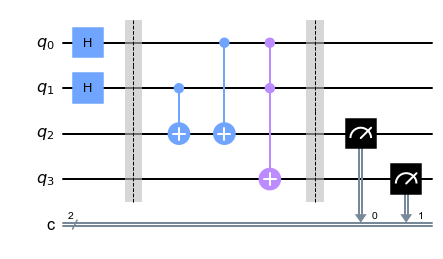

In [8]:
c0.draw()

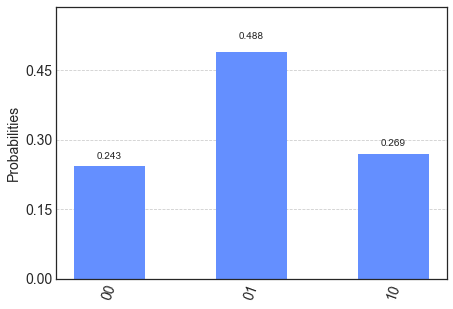

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(rst0.get_counts())